In [1]:
import networkx as nx 
import numpy as np
import pandas as pd
import community
from rpy2 import robjects
import rpy2.robjects.packages as rpackages
mclust = rpackages.importr("mclust")
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
import matplotlib.pyplot as plt
import pickle

## Lastfm

In [2]:
lastfm=pd.read_csv("/Users/app/Desktop/科研资料/With Prof/Prof Qin/Networ Sampling/dataset/Network sampling/Lastfm/lasftm_asia/lastfm_asia_edges.csv")

Edge=[]
for i in range(len(lastfm)):
    edge=(lastfm.node_1[i],lastfm.node_2[i])
    Edge.append(edge)


lastfm = nx.Graph()
lastfm.add_edges_from(Edge)
print(nx.info(lastfm))


Name: 
Type: Graph
Number of nodes: 7624
Number of edges: 27806
Average degree:   7.2943


## P2P

In [3]:
p2p=pd.read_csv("/Users/app/Desktop/科研资料/With Prof/Prof Qin/Networ Sampling/dataset/Network sampling/Gnutella peer-to-peer network, August 8 2002/p2p-Gnutella08.csv",names=['source','target','rate','time'])
Edge_bit=[]
for i in range(len(p2p)):
    edge=(p2p.source[i],p2p.target[i])
    Edge_bit.append(edge)    

p2p = nx.Graph()
p2p.add_edges_from(Edge_bit)
print(nx.info(p2p))

Name: 
Type: Graph
Number of nodes: 6301
Number of edges: 20777
Average degree:   6.5948


## Arixv Coauthor

In [4]:
coauthor=pd.read_csv("/Users/app/Desktop/科研资料/With Prof/Prof Qin/Networ Sampling/dataset/Network sampling/General Relativity and Quantum Cosmology collaboration network/coauthor.csv",names=['node_1','node_2'])
Edge=[]
for i in range(len(coauthor)):
    edge=(coauthor.node_1[i],coauthor.node_2[i])
    Edge.append(edge)

coauthor = nx.Graph()
coauthor.add_edges_from(Edge)
print(nx.info(coauthor))

Name: 
Type: Graph
Number of nodes: 5242
Number of edges: 14496
Average degree:   5.5307


## Bitcoin

In [5]:
bitcoin=pd.read_csv("/Users/app/Desktop/科研资料/With Prof/Prof Qin/Networ Sampling/dataset/Network sampling/Bitcoin Alpha trust weighted signed network/soc-sign-bitcoinalpha.csv",names=['source','target','rate','time'])
Edge_bit=[]
for i in range(len(bitcoin)):
    edge=(bitcoin.source[i],bitcoin.target[i])
    Edge_bit.append(edge)  
bitcoin = nx.Graph()
bitcoin.add_edges_from(Edge_bit)
print(nx.info(bitcoin))


Name: 
Type: Graph
Number of nodes: 3783
Number of edges: 14124
Average degree:   7.4671


## Email

In [2]:
with open ("/Users/app/Desktop/科研资料/With Prof/Prof Qin/Networ Sampling/dataset/Network sampling/email-Eu-core network/email-Eu-core.txt","r") as f:
    re=f.readlines()
node_1=[];node_2=[]
for x in re:
    node_1.append(int(x.split()[0]))
    node_2.append(int(x.split()[1]))
    
Edge=[]
for i in range(len(node_1)):
    edge=(node_1[i],node_2[i])
    Edge.append(edge)

E = nx.Graph()
E.add_edges_from(Edge)
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [14]:
#clustering related
model=E
part_model = community.best_partition(model)
mod_model = community.modularity(part_model,model)
clustnum_model=len(np.unique(list(part_model.values())))
print(clustnum_model,'clusters based on modularity')
A=nx.adjacency_matrix(model)
eigval,eigvec=np.linalg.eig(A.A)
idx = eigval.argsort()[::-1]   
eigval_first =eigval[idx][0:5]
eigvec_first = eigvec[:,idx][:,0:5]
S=np.diag(eigval_first)
S_sqrt=np.sqrt(S)
X_hat=eigvec_first@S_sqrt
print(X_hat.shape)
Clust=mclust.Mclust(X_hat)


27 clusters based on modularity
(1005, 5)
fitting ...
  |======================================================================| 100%


27 clusters based on modularity
9 clusters based on spectral clustering


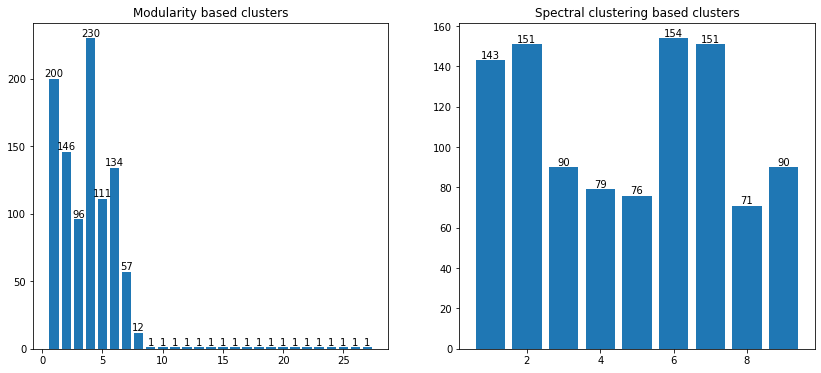

<Figure size 576x360 with 0 Axes>

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(14,6))#,sharex=True,sharey=True)

keys,counts=np.unique(list(part_model.values()),return_counts=True)
keys=keys+1
print(len(keys),'clusters based on modularity')
axes[0].bar(list(keys), counts)
for a,b in zip(keys,counts):
    axes[0].text(a,b+0.1,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=10)
axes[0].set_title("Modularity based clusters")

classification=Clust[14]

plt.figure(figsize=(8,5))
keys, counts = np.unique(classification, return_counts=True)
clustnum_spec_model=keys
axes[1].bar(keys, counts)
for a,b in zip(keys,counts):
    axes[1].text(a,b+0.1,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=10)
axes[1].set_title("Spectral clustering based clusters")
print(len(keys),'clusters based on spectral clustering')
plt.show()